# Redes Neurais 
# Aplicação: Classificar dígitos de escrita manual

In [ ]:
from IPython.display import Image
%matplotlib inline

# Modelando funções complexas com Redes Neurais Artificiais

## Single-layer neural network ou Perceptron

In [ ]:
Image(filename='images/12_01.png', width=600) 

## Arquitetura MLP -  multi-layer neural network 

In [ ]:
Image(filename='images/12_02.png', width=600) 

In [ ]:
Image(filename='images/12_03.png', width=500) 

## Ativando uma rede neural via forward propagation

In [ ]:
Image(filename='images/12_04.png', width=500) 

## Computando a função de custo

In [ ]:
Image(filename='images/12_10.png', width=300) 

## Treinando um rede neural via backpropagation

In [ ]:
Image(filename='./images/12_11.png', width=400) 

In [ ]:
Image(filename='images/12_12.png', width=500) 

# Convergência em redes neurais 

In [ ]:
Image(filename='images/12_13.png', width=500) 

--

# Classificando dígitos manuscritos

## Acessando o MNIST dataset

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 samples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 samples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

In [ ]:
#!pip install tensorflow
#!pip install keras

In [1]:
import keras
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist

In [2]:
%%time
(train_X, train_y), (test_X, test_y) = mnist.load_data()

CPU times: user 338 ms, sys: 11.9 ms, total: 350 ms
Wall time: 351 ms


In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
X_train, y_train = (train_X, train_y)
X_test, y_test =  (test_X, test_y)

### Visualizando o primeiro dígito de cada classe: 

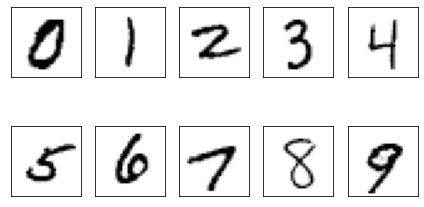

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][10].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

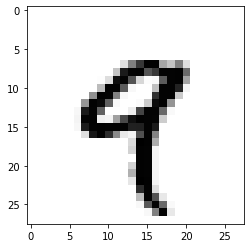

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
img = X_train[4].reshape(28, 28)
ax.imshow(img, cmap='Greys')

In [7]:
y_train[4]

9

In [8]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

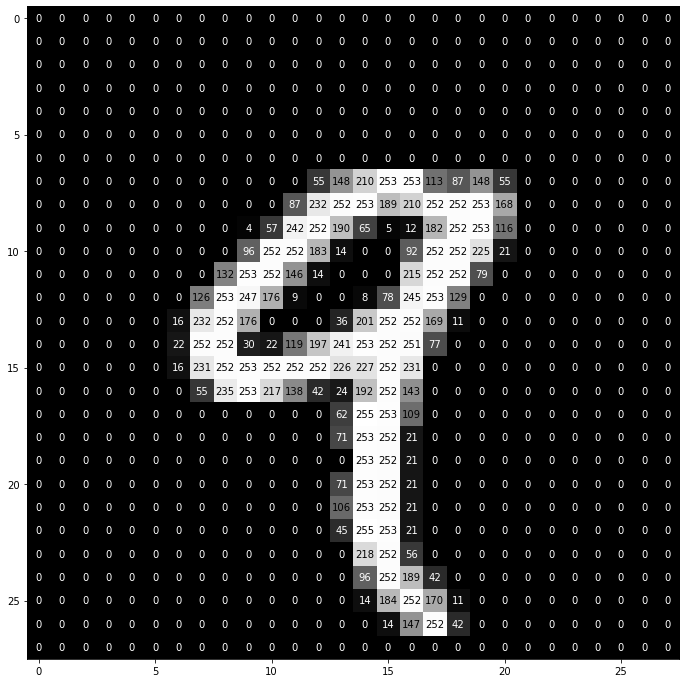

In [9]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[4].reshape(28, 28), ax)

In [10]:
img = X_train[4].reshape(28, 28)
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

<AxesSubplot:ylabel='Density'>

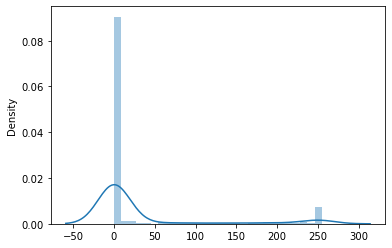

In [13]:
import seaborn as sns
sns.distplot(X_train[4])

In [12]:
import numpy as np

x = X_train[4]
unique, counts = np.unique(x, return_counts=True)

print (np.asarray((unique, counts)).T)

[[  0 642]
 [  4   1]
 [  5   1]
 [  8   1]
 [  9   1]
 [ 11   2]
 [ 12   1]
 [ 14   4]
 [ 16   2]
 [ 21   6]
 [ 22   2]
 [ 24   1]
 [ 30   1]
 [ 36   1]
 [ 42   3]
 [ 45   1]
 [ 55   3]
 [ 56   1]
 [ 57   1]
 [ 62   1]
 [ 65   1]
 [ 71   2]
 [ 77   1]
 [ 78   1]
 [ 79   1]
 [ 87   2]
 [ 92   1]
 [ 96   2]
 [106   1]
 [109   1]
 [113   1]
 [116   1]
 [119   1]
 [126   1]
 [129   1]
 [132   1]
 [138   1]
 [143   1]
 [146   1]
 [147   1]
 [148   2]
 [168   1]
 [169   1]
 [170   1]
 [176   2]
 [182   1]
 [183   1]
 [184   1]
 [189   2]
 [190   1]
 [192   1]
 [197   1]
 [201   1]
 [210   2]
 [215   1]
 [217   1]
 [218   1]
 [225   1]
 [226   1]
 [227   1]
 [231   2]
 [232   2]
 [235   1]
 [241   1]
 [242   1]
 [245   1]
 [247   1]
 [251   1]
 [252  32]
 [253  17]
 [255   2]]


### Visualizando 25 diferentes versões do "9":

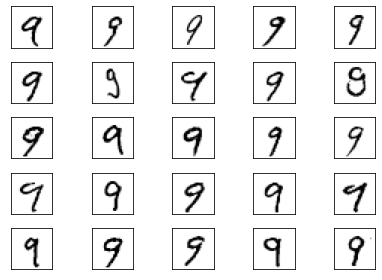

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Reshape dos dados

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
28 * 28

784

In [18]:
X_train = X_train.reshape(X_train.shape[0],  28 * 28)

X_test = X_test.reshape(X_test.shape[0], 28 * 28) 


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# Coloca os dados em Escala

In [19]:
X_train = X_train / 255.0
#y_train = y_train / 255.0
X_test = X_test / 255.0
#y_test = y_test / 255.0

In [20]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
y_train[0]

5

## Salvando dos dados para um objeto (arquivo) 

In [22]:
import numpy as np

np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [23]:
!ls -lha *.npz

-rw-r--r-- 1 valencar valencar 22M out  5 15:43 mnist_scaled.npz


### Carregando os dados de um arquivo

In [24]:
import numpy as np
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [25]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)

## Implementando uma rede MLP - multi-layer perceptron

In [26]:
import numpy as np
import sys

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30) #6000 - 874 x 30 camadas
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training samples per minibatch.
    seed : int (default: None)
        Random seed for initalizing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2 # L2-regularization
        self.epochs = epochs
        self.eta = eta # Learning Rate
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_samples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1) # [ .2, ,.1, ... , 0.6]
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_samples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_samples]
            Target class labels.
        X_valid : array, shape = [n_samples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_samples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx]) # = len(X) X.shape[0]

                ##################
                # Backpropagation
                ##################

                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

## Função para calcular o tempo decorrido

In [27]:
import time
def stopWatch(value):
    import re
    import time
    '''From seconds to Days;Hours:Minutes;Seconds'''

    valueD = (((value/365)/24)/60)
    Days = int (valueD)

    valueH = (valueD-Days)*365
    Hours = int(valueH)

    valueM = (valueH - Hours)*24
    Minutes = int(valueM)

    valueS = (valueM - Minutes)*60
    Seconds = int(valueS)

    #print (Days,";",Hours,":",Minutes,";",Seconds)
    s = (str(Hours) + ":"+str(Minutes)+":"+str(Seconds))    
    pat = re.compile(r'\s+')
    print ('Tempo Decorrido:', pat.sub('', s))
    return True

start = time.time()
for i in range(10000000):
    i += 1
end = time.time() 
stopWatch(end-start)
print(end-start) 

Tempo Decorrido: 0:0:1
1.2710959911346436


## Treinando uma Rede Neural com as imagens de dígitos manuscritos

In [28]:
%%time 

# Aproximate training time: 14 mins, MacbookPro I5, 2.6 GHz Intel Core i5, 8 GB 1600 MHz DDR3, n_hidden=100
# Aproximate training time: 17 mins, n_hidden=200
# Aproximate training time: 20 mins, n_hidden=200, l2=0.1
# Aproximate training time: 21 mins, n_hidden=200, l2=0.02, n_epochs=200, eta=0.0005
# Aproximate training time: 6 mins, n_hidden=200, l2=0.02, n_epochs=200, 200/200 | 
#    Macbook I7,                       Cost: 5227.82 | Train/Valid Acc.: 99.29%/98.40% 

#import time
#start = time.time()
n_epochs = 20 #100 
l2=0.02
nn = NeuralNetMLP(n_hidden=100, 
                  l2=l2, 
                  epochs=n_epochs, 
                  eta= 0.0005, #0.001, # 0.0005, # 0.1, 0.3 - 0.01, 0.1, 0.001, 0.0001
                  minibatch_size=256, #128, # 64, 128, 256 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:55000], 
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

#end = time.time() 
#stopWatch(end-start)

20/20 | Cost: 25812.00 | Train/Valid Acc.: 93.24%/94.90% 

CPU times: user 1min 8s, sys: 3.42 s, total: 1min 11s
Wall time: 36 s


In [ ]:
# Com Escala: 20/20 | Cost: 25812.00 | Train/Valid Acc.: 93.24%/94.90% 

# 20/20 | Cost: 26195.60 | Train/Valid Acc.: 93.03%/94.58% 
# 15/15 | Cost: 28130.68 | Train/Valid Acc.: 92.66%/94.06% 

In [ ]:
# 14/14 | Cost: 28668.96 | Train/Valid Acc.: 92.41%/94.38% 
# Tempo Decorrido: 0:0:48
# Test accuracy: 92.02%

# Salvando o modelo para o disco 

In [ ]:
# O Modelo
nn

In [ ]:
atributos = list( nn.__dict__.keys() )
print('Atributos: ', atributos, sep="\n")

In [ ]:
print('Atributos:\n', '\n+'.join(atributos))

In [ ]:
nn.n_hidden

In [ ]:
nn.eval_

In [ ]:
print(nn.__dict__)

In [ ]:
import pickle
# save the model to disk
filename = 'neuralnet_model.sav'
print('Saving file ' + filename + '...')
pickle.dump(nn, open(filename, 'wb'))
print('File Saved ' + filename + '.') 

In [ ]:
!head neuralnet_model.sav

In [ ]:
!ls -ilha *.sav

# Carregando o modelo do disco

In [ ]:
# load the model from disk
print('Loading file' + filename + '...')
loaded_model = pickle.load(open(filename, 'rb'))
predict = loaded_model.predict(X_test)
result = sum(predict == y_test) / len(predict)
print(result)

## Exibindo as métricas da Rede Neural

In [ ]:
print('cost:', np.mean(nn.eval_['cost']))
print('train_acc:', np.mean(nn.eval_['train_acc']))
print('valid_acc:', np.mean(nn.eval_['valid_acc']))
nn.w_out[0]


---

## Plotando análises

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14,8]

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

In [ ]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
#plt.savefig('images/12_08.png', dpi=300)
plt.show()

In [ ]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

## Plotando algumas predições erradas do conjunto de teste 

In [ ]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) obs:%d prev:%d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.rcParams["figure.figsize"] = [14,8]
plt.show()

---